# Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/gugIA5r.png width=700>



### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).


## Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.io as pio
import scipy.stats as stats

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Read the Data

In [3]:
df_yearly = pd.read_csv('data/annual_deaths_by_clinic.csv')
# parse_dates to avoid DateTime conversion later
df_monthly = pd.read_csv('data/monthly_deaths.csv', 
                      parse_dates=['date'])

## Preliminary Data Exploration


In [4]:
print(df_yearly.shape)
df_yearly

(12, 4)


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [5]:
print(df_monthly.shape)
df_monthly.tail()

(98, 3)


,date,births,deaths
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12
97,1849-03-01,406,20


### Checking for Nan Values and Duplicates

In [6]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [7]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [8]:

print(f'Any yearly NaN values? {df_monthly.isna().values.any()}')
print(f'Any monthly NaN values? {df_yearly.isna().values.any()}')

Any yearly NaN values? False
Any monthly NaN values? False


In [9]:
print(f'Any yearly duplicates? {df_yearly.duplicated().values.any()}')
print(f'Any monthly duplicates? {df_monthly.duplicated().values.any()}')

Any yearly duplicates? False
Any monthly duplicates? False


### Descriptive Statistics

In [10]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [11]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


**We see that on average there were about 267 births and 22.47 deaths per month.**



## Percentage of Women Dying in Childbirth in Vienna


In [12]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


**In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)**

# Visualising the Total Number of Births 🤱 and Deaths 💀 over Time

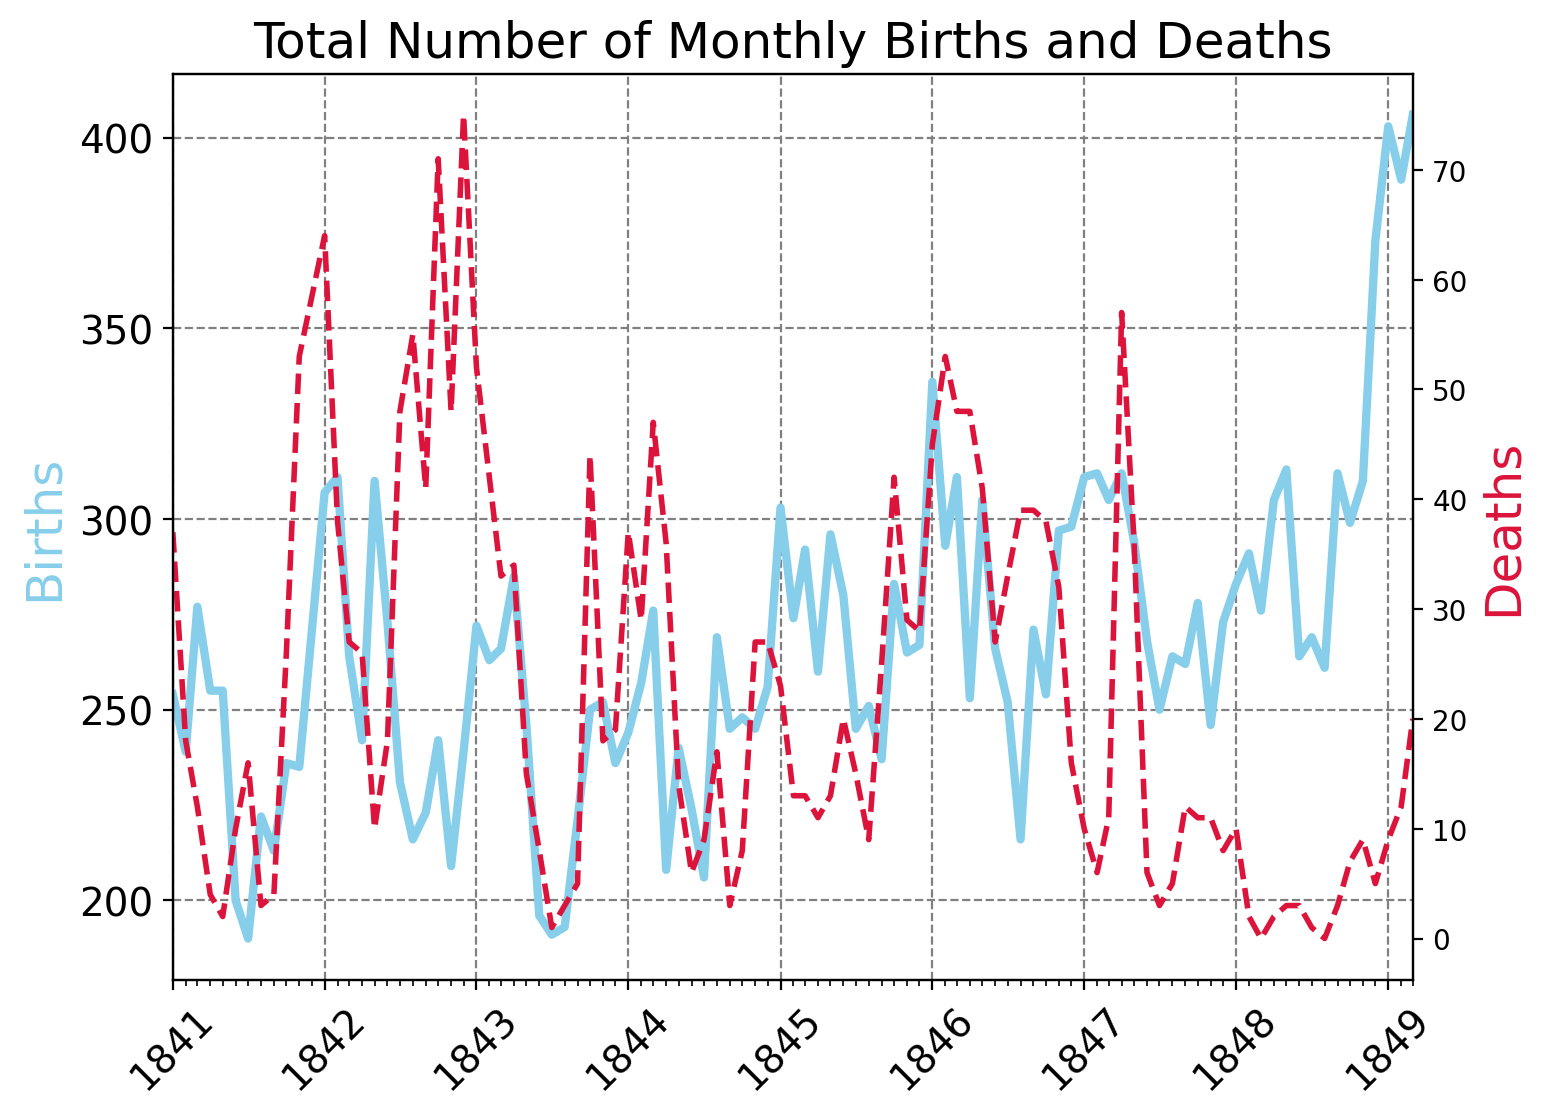

In [36]:
plt.figure(figsize=(8,6), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)

# Add locators for tick marks
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)

ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')

plt.show("svg")

**The total number of deaths seems to have dropped after 1847, despite an increasing number of births!**

## The Yearly Data Split by Clinic



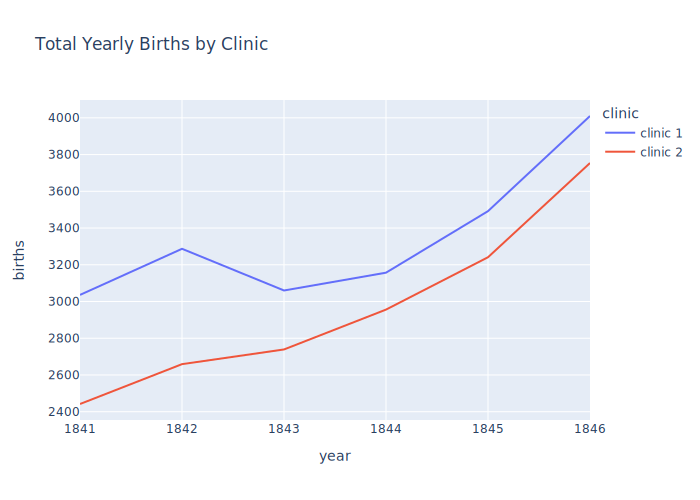

In [14]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')

line.show("svg")

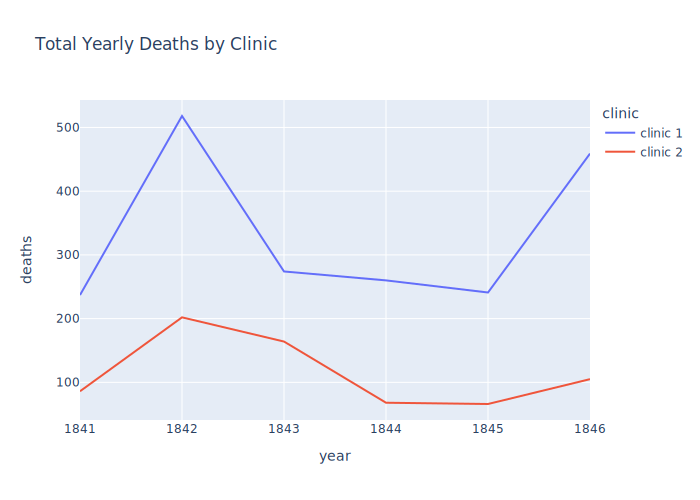

In [15]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')

line.show("svg")

**Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2.**

## Calculation of the Proportion of Deaths at Each Clinic

In [16]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07
5,1846,4010,459,clinic 1,0.11
6,1841,2442,86,clinic 2,0.04
7,1842,2659,202,clinic 2,0.08
8,1843,2739,164,clinic 2,0.06
9,1844,2956,68,clinic 2,0.02


In [17]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [18]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.


## Proportion of Yearly Deaths by Clinic

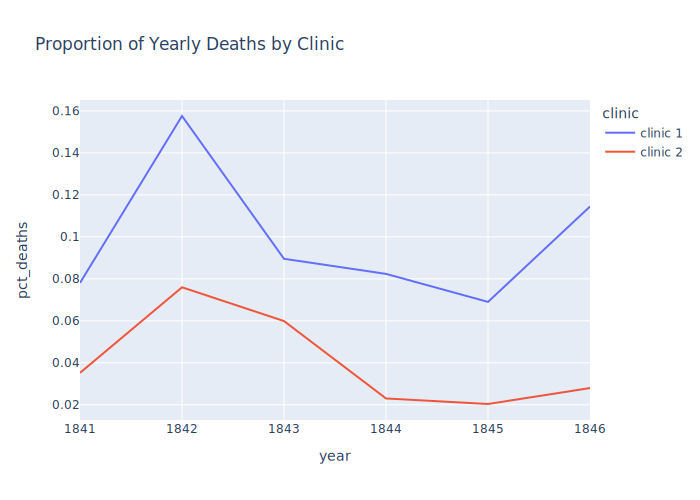

In [19]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')

line.show("svg")

**From above line chart about 16% of women died in clinic 1 and about 7.6% of women died in clinic 2.**

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [20]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

## Calculation of death rate before and after Handwashing rule 
### Adding new column `pct_deaths` to dataset

In [21]:
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births

### Splitting dataset into two by when handwashing was made obligatory

In [22]:
# Split monthly into before and after handwashing_start
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [23]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
print(f'Average death rate BEFORE 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate BEFORE 1847 was 10.53%
Average death rate AFTER 1847 was 2.15%


**Since handwashing was made obligatory the Average death rate was significantly reduced.The difference is massive.<br> Handwashing decreased the average death rate by 8.4%, a 5x improvement!!**

### Calculate a Rolling Average of the Death Rate

In [24]:
# Converting Date Column to Index first so does not get dropped
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()
roll_df

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.50,29.00,0.11
1847-02-01,290.50,23.50,0.08
1847-03-01,296.17,18.83,0.07


### Highlighting Subsections of a Line Chart


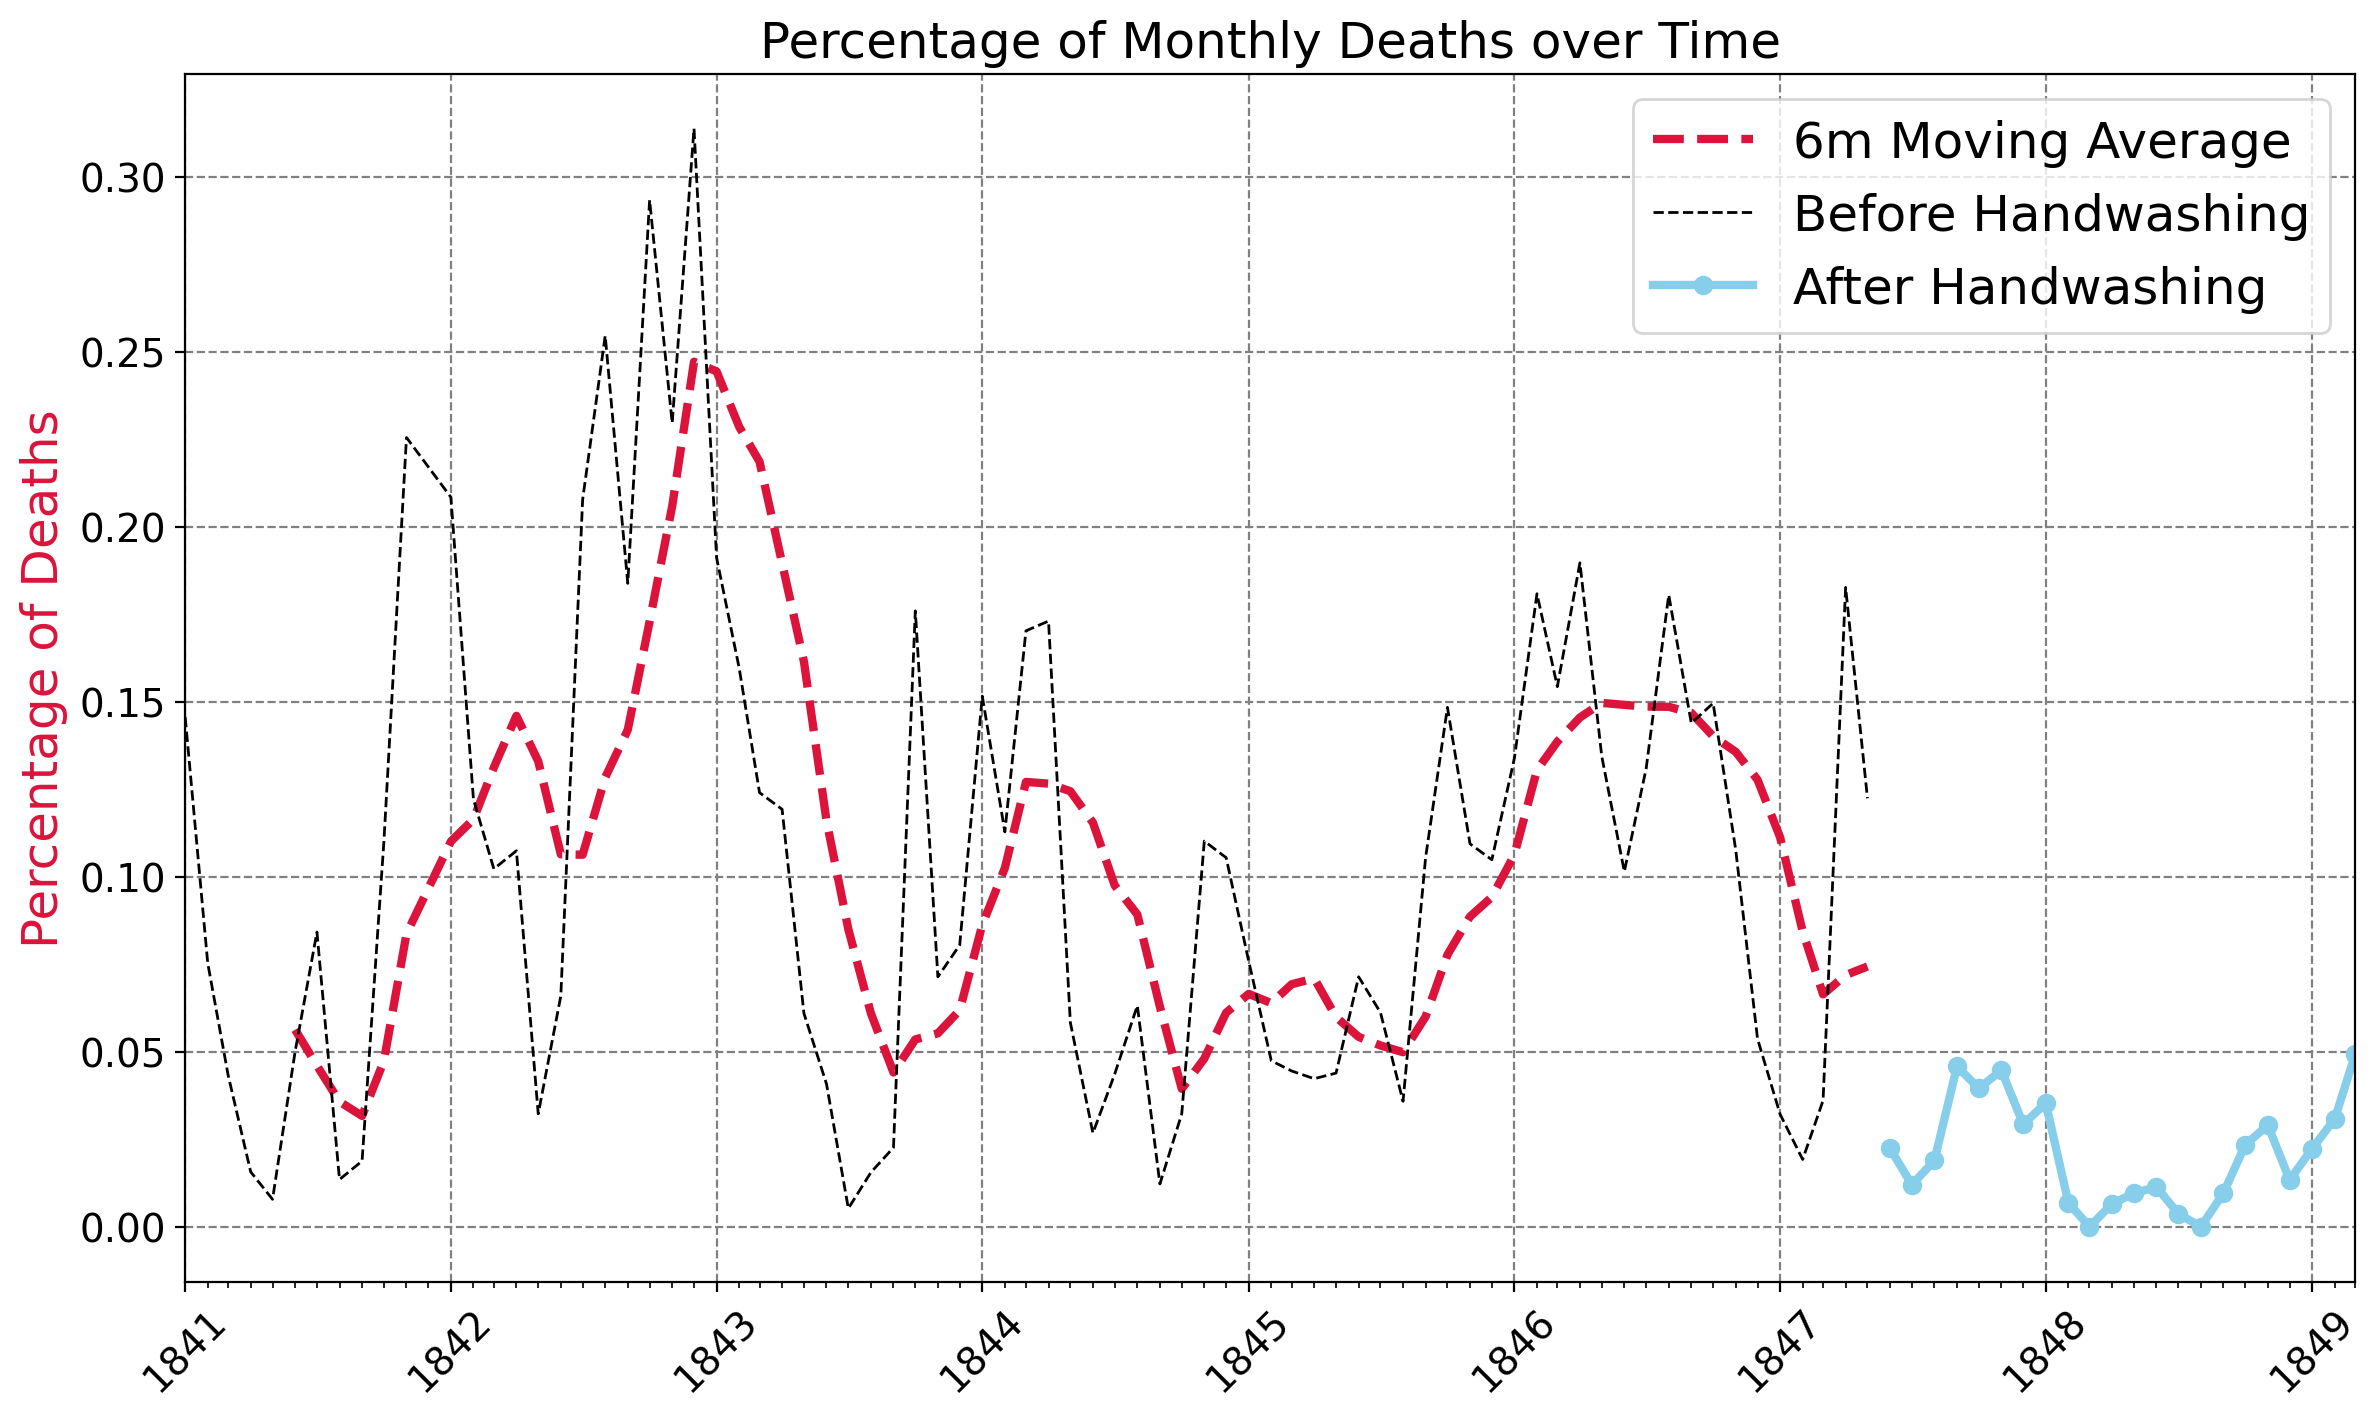

In [45]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

plt.grid(color='grey', linestyle='--')

ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)

plt.show("svg")

## Statistics - The Difference in the Average Monthly Death Rate



In [26]:
avg_prob_before = before_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')

avg_prob_after = after_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')

mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')

times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 2.11%.
Handwashing reduced the monthly proportion of deaths by 8.4%!
This is a 5.0x improvement!


## How the Death Rate Changed Before and After Handwashing





In [27]:

df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

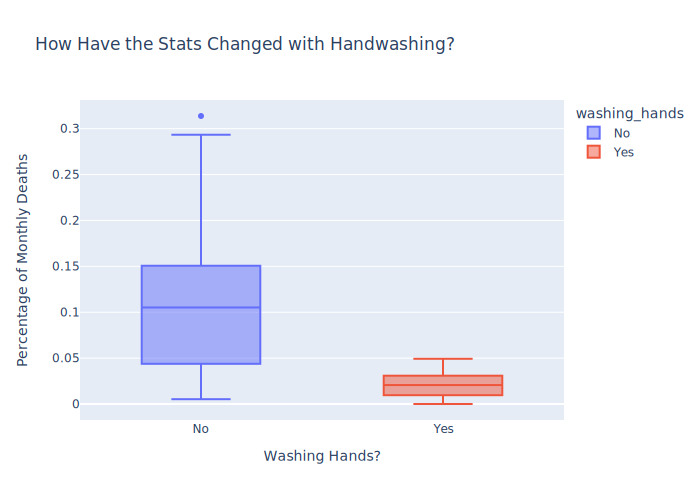

In [28]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')

box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)

box.show("svg")

**The plot shows the same data as our Matplotlib chart, but from a different perspective. Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital.**

## Visualising the Monthly Distribution of Outcomes with histogram



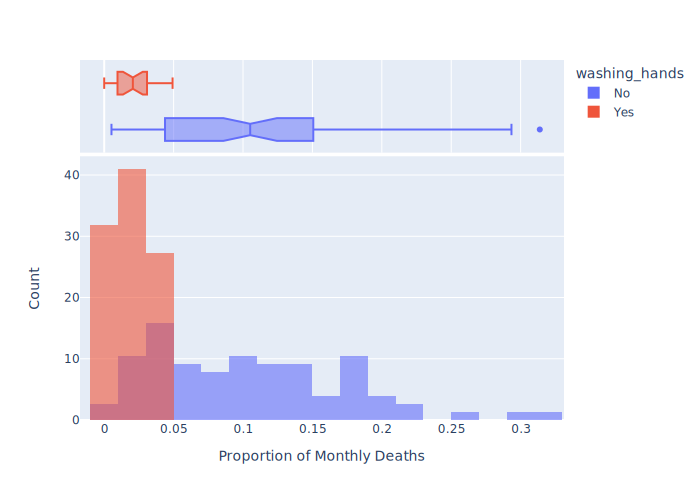

In [29]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)

hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)

hist.show("svg")

**Since there are only about 98 data points, histogram looks a bit jagged. It's not a smooth bell-shaped curve. <br>However, we can estimate what the distribution would look like with a Kernel Density Estimate (KDE).**

## Kernel Density Estimate (KDE) to visualise a smooth distribution


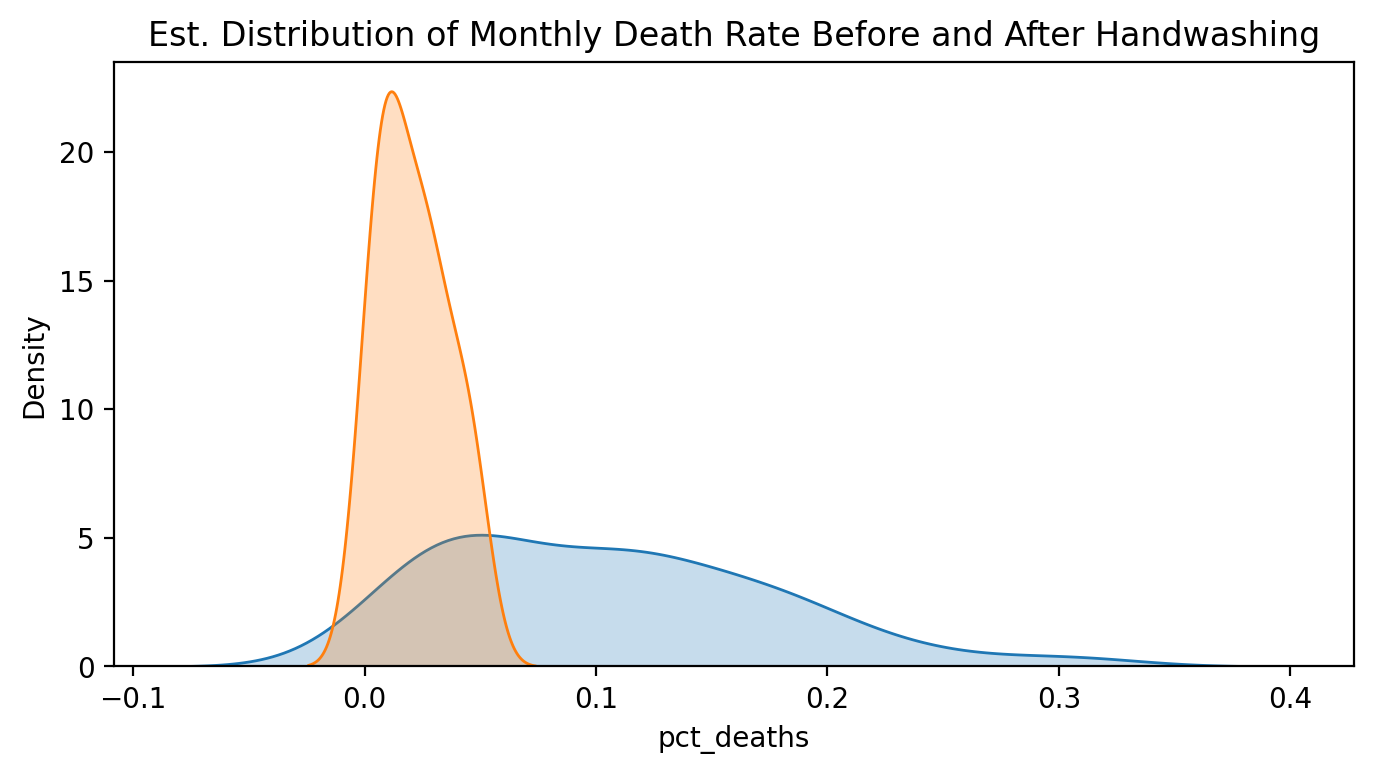

In [42]:

plt.figure(figsize=(8,4),dpi=200)

sns.kdeplot(before_washing.pct_deaths, shade=True)
sns.kdeplot(after_washing.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show("svg")

clipping the graph to avoid negative percentage deaths. 

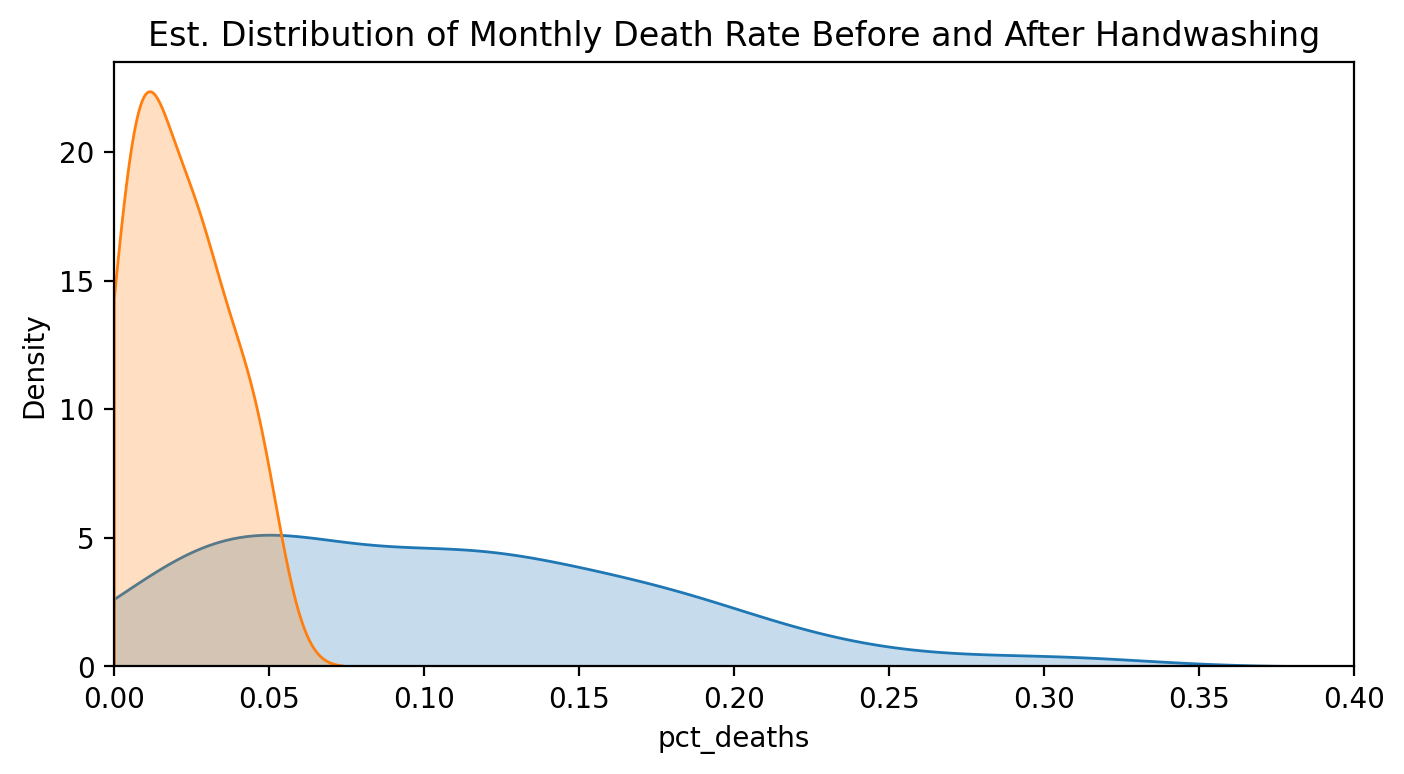

In [43]:


plt.figure(figsize=(8,4),dpi=200)
sns.kdeplot(before_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

**The arguement for handwashing can be further strengthen by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (i.e., the lower death rate is just an accident) or if the 8.4% difference in the average death rate is statistically significant.**

### Using T-Test to Show Statistical Significance

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 



In [32]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512


**When we calculate the p_value we see that it is 0.0000002985 or .00002985% which is far below even 1%. <br>In other words, the difference in means is highly statistically significant.**